![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 5: Erros parciais e erros totais

# Parte 1: Método do retângulo

Para calcular uma aproximação para uma integral,
o método do retângulo divide o intervalo de integração em $N$ intervalos $I_i = [x_i,x_{i+1}]$,
com $i=0,\ldots,N-1$.
O erro parcial no intervalo $I_i$ é definido como a diferença entre a aproximação do método do retângulo
e a integral exata neste intervalo.

## Questão 1: Todos os termos do método do retângulo

Para estudarmos as propriedades dos erros parciais,
implemente a função `rect_parcs(f, a, b, N)`,
que integra a função `f` de `a` até `b` pelo método do retângulo,
utilizando `N` intervalos,
que retorna:
- uma lista (ou `np.array`) com os pontos iniciais dos intervalos utilizados; e
- uma lista (ou `np.array`) com a aproximação da integral em cada intervalo.

In [2]:
def rect_parcs(f, a, b, N):
    h = np.abs(a-b)/N
    init_points = np.linspace(a,b,N,endpoint=False)
    approx = []
    for init in init_points:
        approx.append(h*f(init))
    return init_points, approx

In [3]:
def f(x): return 2*x
xs, parcs = rect_parcs(f,0,1, 100)

assert len(xs) == len(parcs) == 100
assert np.isclose(np.sum(parcs),1,atol=1e-2)

In [4]:
def f(x): return 2*x
xs, parcs = rect_parcs(f,0,1, 10000)

assert len(xs) == len(parcs) == 10000
assert np.isclose(np.sum(parcs),1,atol=1e-4)

In [5]:
def f(x): return 2*x
xs, parcs = rect_parcs(f,0,1, 100)

assert xs[-1]+xs[1]-xs[0] == 1

## Questão 2: Testando com o seno

Vamos trabalhar com a função $\sin(x)$.
Para comparar com a integral exata,
você vai precisar de uma função `int_sin(a,b)` que calcule o valor exato de $\int\limits_{a}^{b}\sin(x)dx$.

In [6]:
def int_sin(a,b):
    return np.cos(a)-np.cos(b)

In [7]:
assert int_sin(1,2) == -int_sin(2,1)
assert int_sin(3,3) == 0
assert np.isclose(int_sin(-np.pi/2,0),-1)

Calcule a integral de $\sin(x)$ de $0$ até $\pi$, usando 15 divisões pelo método do retângulo,
e faça um gráfico mostrando o erro parcial em cada intervalo em função do ponto inicial de cada intervalo.

Text(0, 0.5, 'Erro')

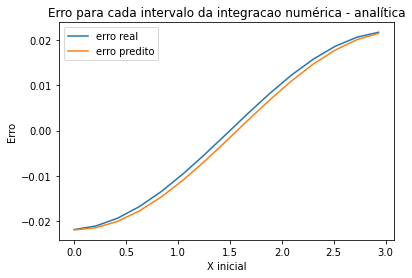

In [8]:
xs, parcs = rect_parcs(np.sin, 0, np.pi, 15)
h = np.abs(0-np.pi)/15
erro = [parcs[i-1] - int_sin(xs[i-1],xs[i]) for i in range(1,len(xs))]
erro.append( (parcs[-1] - int_sin(xs[-1],xs[-1]+h)) )
erro_esperado = [-0.5*h*h*np.cos(xi) for xi in xs]
plt.plot(xs,erro,label="erro real")
plt.plot(xs,erro_esperado,label="erro predito")
plt.legend()
plt.title("Erro para cada intervalo da integracao numérica - analítica")
plt.xlabel("X inicial")
plt.ylabel("Erro")

Explique o gráfico acima. O formato deste gráfico te lembra alguma coisa?

O gráfico acima é similar ao gráfico da função coseno. De fato, se analisarmos analiticamente, temos que o erro $e_k$ de cada intervalo é dado por:
$
\begin{equation}
e_k = hf(x_k) - \int_{x_k}^{x_{k+1}} f(x) dx\\
e_k = \int_{x_k}^{x_{k+1}} f(x_k) - f(x) dx
\end{equation}
$
Fazendo a substituição de "x" por $x_k + ht$, temos que $dx = h.dt$ nessa nova substituição. Portanto:<p>
$
\begin{equation}
e_k = \int_{0}^{1} [f(x_k) - f(x_k + th)]h dt
\end{equation}
$
<p>Sabendo ainda que a expansão de Taylor nos dá:
$
\begin{equation}
f(x+\epsilon) = f(x) + f'(x).\epsilon + r_k(\epsilon)\\
f(x) - f(x+\epsilon) = - f'(x).\epsilon + r_k(\epsilon)\\
\end{equation}
$
<p>Substituindo a expansão a cima na integral:
$
\begin{equation}
e_k = \int_{0}^{1} [- f'(x)th + r_k(th)]h dt\\
\text{(h e f'(x) são constantes, logo podem sair da integral)}\\
e_k = -f'(x)h*h\int_{0}^{1}t dt + h\int_{0}^{1}r_k(th) dt\\
e_k = -\frac{f'(x)h^2}{2} + o(h^2)\\
\end{equation}
$
<p> Assim, vemos pela expressão do erro que a parte dominante é proporcional a menos a derivada da função que queremos calcular a integral multiplicado pelo h - tamanho do intervalo entre x's consecutivos - elevado ao quadrado. De fato, se plotarmos o gráfico do erro esperado vemos que ele é praticamente igual ao obtido empiracamente. Essa diferença se dá pelo termo $o(h^2)$ que não foi levado em conta no cálculo do erro predito.

## Questão 3: Variando `N`

Repita o experimento acima para `N` $=10,100$ e $1000$, fazendo três gráficos lado a lado.

Sugestão: escreva uma função `errs_rect(f, a, b, N, int_f)`
que calcula os erros de integração de $f$,
dado o intervalo $[a,b]$, o número de subdivisões $N$
e uma função `int_f` que retorna a integral analítica (como `int_sin`).

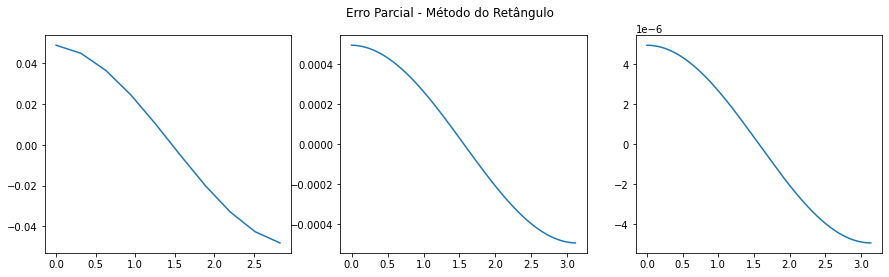

In [9]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=False)

num_divs = [10,100,1000]

for i, N in enumerate(num_divs):
    xs, parcs = rect_parcs(np.sin, 0, np.pi, N)
    h = np.abs(0-np.pi)/N
    erro = [int_sin(xs[i-1],xs[i]) - parcs[i-1] for i in range(1,len(xs))]
    erro.append( ( int_sin(xs[-1],xs[-1]+h) - parcs[-1]) )
    axs[i].plot(xs,erro)
#     axs[i].set_xlabel("X inicial")
#     axs[i].set_ylabel("Erro")
plt.suptitle("Erro Parcial - Método do Retângulo");

Comente. Como os erros parciais variam em função do número de divisões do intervalo?

Vemos que a forma da curva é a mesma. Percebemos ainda que, indo da esquerda para a direita, o valor máximo e mínimo são divididos por 100 em relação ao anterior. Isso porque como os valores de N são multiplicados por 10, os valores de $h = \frac{b - a}{N}$ são reduzidos pela décima parte. Além disso, pela equação do erro encontrada anteriormente, 
<p>
$
\begin{equation}
e_k = -\frac{f'(x)h^2}{2} + o(h^2)\\
\end{equation}
$
<p>temos que se h cai a décima parte, o erro cai a um centésimo, devido a relação quadrática.


Vamos definir o $i$-ésimo erro total como a soma dos erros parciais dos intervalos $I_1$, $I_2$, até $I_i$.

Faça mais um gráfico triplo, para os mesmos valores de `N`,
desta vez mostrando o $i$-ésimo erro total em função do final do $i$-ésimo intervalo.

Dica: `np.cumsum`

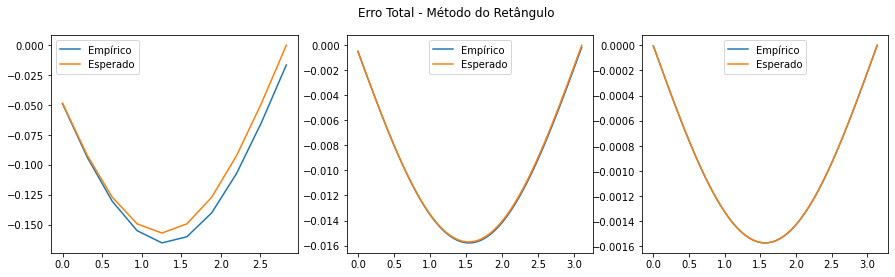

In [10]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=False)

num_divs = [10,100,1000]

for i, N in enumerate(num_divs):
    xs, parcs = rect_parcs(np.sin, 0, np.pi, N)
    erro = [parcs[i-1] - int_sin(xs[i-1],xs[i]) for i in range(1,len(xs))]
    h = np.abs(0-np.pi)/N
    erro.append( (parcs[-1] - int_sin(xs[-1],xs[-1]+h) )  )
    erro_esperado = [-0.5*h*(np.sin(xs[i]) - np.sin(xs[0]) ) for i in range(1,len(xs))]
    erro_esperado.append(-0.5*h*(np.sin(xs[-1] + h) - np.sin(xs[0]))) 
    axs[i].plot(xs,np.cumsum(erro),label="Empírico")
    axs[i].plot(xs,erro_esperado,label="Esperado")
    axs[i].legend()
plt.suptitle("Erro Total - Método do Retângulo");

O formato destes gráficos te lembra alguma coisa?

O formato se parece com a função -seno. Nota-se ainda que todas as curvas foram próximas ao erro esperado,contudo o  primeiro gráfico da esquerda para a direita apresenta uma diferença maior. Isso se dá por conta do termo o(h), que é tão desprezível quanto menor o tamanho de h. Como o h é maior no primeiro gráfico, faz sentido ter um erro maior, que diminui conforme aumentamos N. O comportamento dessas curvas pode ser explicado fazendo-se a análise do somatório do erro:
<p>
$
\begin{equation}
e_k = -\frac{f'(x)h^2}{2} + o(h^2)\\
e_total = \sum_{k = 0}^{k = N-1} -\frac{f'(x)h^2}{2} + o(h^2)\\
\end{equation}
$
<p> Contudo, se uma função g(x) qualquer é integrável à Riemann, então temos que:
<p>
$
\begin{equation}
\lim_{h \to 0}\sum_{k = 0}^{k = N-1}h g(x_k) = \int_a^b g(x) dx + o(1)\\
\end{equation}
$
<p> Como a função f'(x) atende a essa condição, podemos substituir na equação do erro
$
\begin{equation}
e_{total} = \sum_{k = 0}^{k = N-1} -\frac{f'(x)h^2}{2} + o(h^2)\\
e_{total} =  \int_{a}^{b} -\frac{f'(x)h^2}{2} dx + o(h) + o(1) \\
e_{total} =  -\frac{(f(b) - f(a))h}{2} + o(h)\\
\end{equation}
$
<p>
Vemos que seno(b) - seno(a) = sen(b) - sen(0) = -sen(b). No intervalo $[0,\pi]$ temos que a função seno é positiva e com concavidade para baixo, portanto -sen(b) apresenta o comportamento oposto.

Os erros totais diminuem ou aumentam quando o número de divisões do intervalo aumenta? Na mesma proporção que os erros parciais? Porquê?

Os erros totais diminuem conforme o aumento de deivisões do intervalo, contudo em proporção diferente dos erros parciais. Isso porque segundo a equação acima, a componente dominante do erro é proporcial a menos a integral no intervalo [a,b] multiplicada por h. Assim, o decaimento do erro total é linear com o aumento das divisões, enquanto para os erros parciais é quadrático por conta do termo $h^2$ 

# Parte 2: Método do trapézio

Vamos repetir a análise para o método do trapézio.

## Questão 4: Termos do trapézio

Primeiro, defina a função `trap_parcs(f, a, b, N)`, nos mesmos moldes de antes.

In [11]:
def trap_parcs(f, a, b, N):
    h = np.abs(a-b)/N
    init_points = np.arange(a,b,h)
    approx = []
    for init in init_points:
        approx.append(0.5*h*( f(init) + f(init + h) ) )    
    return init_points, approx

In [12]:
def f(x): return x**2
xs, parcs = trap_parcs(f,0,1, 100)

assert len(xs) == len(parcs) == 100
assert np.isclose(np.sum(parcs), 1/3, atol=1e-4)

## Questão 5: Gráficos

Faça o gráficos dos erros parciais para o seno, variando o número de divisões do intervalo de integração.

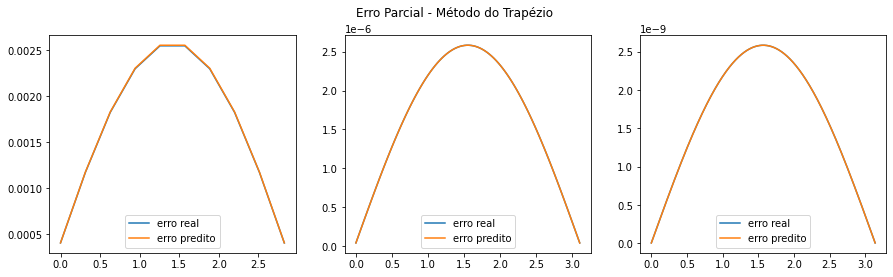

In [13]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=False)

num_divs = [10,100,1000]

for i, N in enumerate(num_divs):
    xs, parcs = trap_parcs(np.sin, 0, np.pi, N)
    h = np.abs(0-np.pi)/N
    erro = [int_sin(xs[i-1],xs[i]) - parcs[i-1] for i in range(1,len(xs))]
    erro.append( ( int_sin(xs[-1],xs[-1]+h) - parcs[-1]) )
    erro_esperado = [h*h*h*np.sin(xi + h/2)/12 for xi in xs]
    axs[i].plot(xs,erro,label="erro real")
    axs[i].plot(xs,erro_esperado,label="erro predito")
    axs[i].legend()

plt.suptitle("Erro Parcial - Método do Trapézio");

Comente. O que mudou dessa vez?

Dessa vez o erro parcial se parece mais com a função seno. Isso se dá porque, seguindo um procedimento análogo ao caso da integração por retângulos infinitesimais, encontramos que a fórmula do erro dominante é:
<p>
$
\begin{equation}
erro_{parcial} = -\frac{f''(m_k)h^3}{12}
\end{equation}
$
<p>
 Assim, é de se esperar que multiplicar o número de divisões do intervalo o erro decaia na ordem de 3 casas decimais. Além disso, o formato dessa curva é explicado pelo termo $f''(m_k)$, sendo $m_k$ o ponto médio de cada intervalo $[x_k,x_{k+1}]$. Para a função seno temos que sua segunda derivada é -seno. Portanto, ao colocarmos na fórmula acima temos que o erro é proporcional a -(-seno) = seno, o que explica a sua concavidade no intervalo acima.

Agora faça o gráficos dos erros totais variando o número de divisões do intervalo de integração.

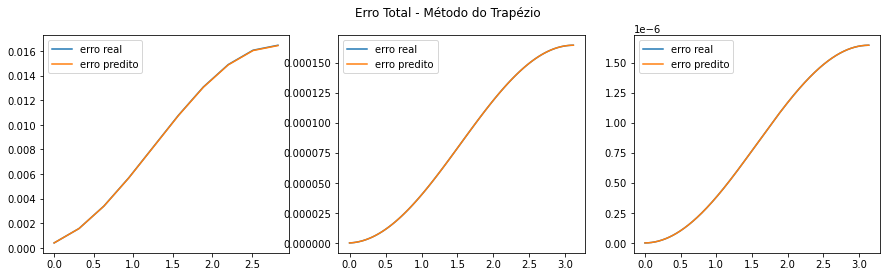

In [14]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=False)

num_divs = [10,100,1000]

for i, N in enumerate(num_divs):
    xs, parcs = trap_parcs(np.sin, 0, np.pi, N)
    erro = [int_sin(xs[i-1],xs[i]) - parcs[i-1] for i in range(1,len(xs))]
    h = np.abs(0-np.pi)/N
    erro.append( ( int_sin(xs[-1],xs[-1]+h) - parcs[-1]) )
    erro_esperado = [-h*h*(np.cos(xi + h) - np.cos(xs[0]))/12 for xi in xs]
    axs[i].plot(xs,np.cumsum(erro),label="erro real")
    axs[i].plot(xs,erro_esperado,label="erro predito")
    axs[i].legend()

plt.suptitle("Erro Total - Método do Trapézio");

Comente o gráfico, relacionando com os gráficos vistos anteriormente.

Vemos nesse gráfico que o erro também diminui com o aumento do espaçamento no intervalo. Contudo, temos que para o caso do trapézio, o erro total é proporcional a:
<p>
$
\begin{equation}
erro_{total} = -\frac{(f'(b) - f'(a))h^2}{12}
\end{equation}
$
<p> 
 Isso significa que, comparado ao erro do retângulo, o erro trapezoidal cai muito mais rápido, por conta do termo $h^2$, enquanto no caso do retângulo é proporcional a h. No intervalo $[0,\pi]$ temos que a derivada do cos(x), -sen(x), é negativa, o que significa que cos(0) - cos(x) = 1 - cos(x) é crescente nesse intervalo. Isso justifica o comportamento da curva verificado acima.

Text(0.5, 1.0, 'Comportamento da função -sin(x) no intervalo [0,$\\pi$]')

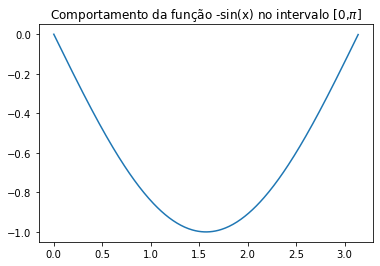

In [15]:
x = np.arange(0,np.pi,0.01)
y = -np.sin(x)
plt.plot(x,y)
plt.title("Comportamento da função -sin(x) no intervalo [0,$\pi$]")

## Questão 6: Retângulo e Trapézio

Vamos "transpor" os gráficos:
Para cada ponto $x_i = \pi/4$, $\pi/3$ e $\pi/2$,
faça um gráfico do erro de integração no intervalo $[x_i, x_i + h]$ em função de $h$,
variando de $\pi/10$ a $\pi/1000$.

Faça 2 curvas em cada gráfico: uma para o método do retângulo, e outra para o do trapézio.
Não esqueça de incluir títulos e legendas!

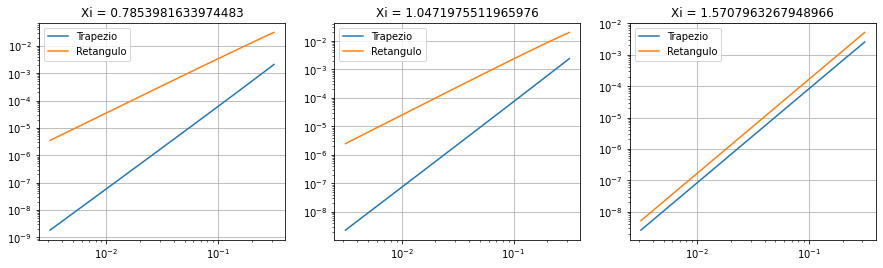

In [16]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4))
xs = np.pi * np.array([1/4, 1/3, 1/2])
hs = np.linspace(np.pi*0.1,np.pi*0.001)
def compute_error(f,xi,h):
    _, parcs = f(np.sin, xi, xi+h, 1)
    return np.sum(parcs) - int_sin(xi,xi+h)
for i, xi in enumerate(xs):
    errors_trap = [compute_error(trap_parcs,xi,h) for h in hs]
    errors_rect = [compute_error(rect_parcs,xi,h) for h in hs]
    axs[i].plot(hs,np.abs(errors_trap),label="Trapezio")
    axs[i].plot(hs,np.abs(errors_rect),label="Retangulo")
    axs[i].legend()
    axs[i].set_title(f"Xi = {xi}")
    axs[i].loglog()
    axs[i].grid()

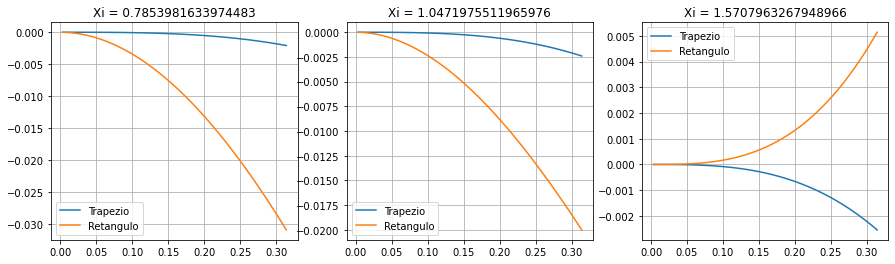

In [17]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4))
for i, xi in enumerate(xs):
    errors_trap = [compute_error(trap_parcs,xi,h) for h in hs]
    errors_rect = [compute_error(rect_parcs,xi,h) for h in hs]
    axs[i].plot(hs,errors_trap,label="Trapezio")
    axs[i].plot(hs,errors_rect,label="Retangulo")
    axs[i].legend()
    axs[i].set_title(f"Xi = {xi}")
    axs[i].grid()

Text(0.5, 1.0, 'Comportamento de sin(x) no intervalo [$\\pi/4$,$\\pi/2$]')

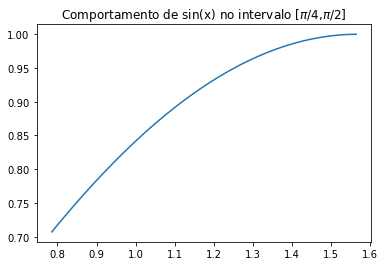

In [18]:
x = np.arange(np.pi/4,np.pi/2,0.01)
y = np.sin(x)
plt.plot(x,y)
plt.title(r"Comportamento de sin(x) no intervalo [$\pi/4$,$\pi/2$]")

O que você observa nestes gráficos?

O erro do trapézio, na escala loglog do valor absoluto, tem um coeficiente angular maior em módulo se comparado com o do retângulo. Isso se dá pelo que foi discutido anteriormente, dado que o erro no retângulo é proporcional a $h$ e no trapézio proporciona a $h^2$. Nota-se ainda que, para $xi = \pi/2$, temos que tanto a integral pela fórmula do retângulo quanto a do trapézio se aproximam bastante em relação ao coeficiente angular, sendo praticamente paralelas. Isso se deve ao fato de que a derivada do seno próximo a $\pi/2$ é quase 0. Isso significa que $f(b) \approx f(a) \to \frac{f(b) + f(a)}{2} \approx f(a)$. Isso faz com que a fórmula para o trapézio seja praticamente idêntica a fórmula do retângulo quanto mais próximo do ponto de máximo da função seno $xi$ e $xi + h$ estiver.

Outro ponto a se notar é que nos dois primeiros gráficos os erros são negativos e aumentam conforme maior o $h$. Isso signifa que ambos os métodos estimam um valor menor para a integral do que ela realmente é. Para o caso do retângulo temos que nessa faixa de valores - distantes do ponto de máximo - sen(xi+h) > sen(xi) dado que a função é crescente. Portanto, quando fazemos a área nesse retângulo infinitesimal, temos um valor menor. Já para o trapézio é mais de simples de ver, pois ele fica inteiramente contido na área abaixo da curva. Assim, quando a função é positiva o trapézio estima para menos, e quando é negativa ele estima para mais (valor da área menos negativa).

No gráfico mais a direita, vemos que o erro aumenta conforme h e é positivo para o retângulo, dado que uma parte dele está fora da curva, e é negativo para o trapézio conforme discutido anteriormente.